In [3]:
import pandas as pd
import sklearn

In [6]:
df = pd.read_csv('output.csv') #hier eigene Daten

print(df['activity label'].nunique())
print(df['concept:name'].nunique())
print(df['CO_rule'].nunique())

print(df['AT_rule'].unique())
print('-'*60)
print(df['CT_rule'].unique())
print('-'*60)
print(df['TT_rule'].unique())
print('-'*60)
print(df['CO_rule'].unique())

df

KeyError: 'activity'

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from math import log

#X1 = df.groupby(['Resource', 'Activity']).size().unstack().fillna(0)
#X2 = df.groupby(['Resource', 'CO']).size().unstack().fillna(0)
X1 = df.groupby(['org:resource', 'concept:name']).size().unstack().fillna(0) #concept name = activity
X2 = df.groupby(['org:resource', 'CO_rule']).size().unstack().fillna(0)
#X = X.applymap(lambda x: log(x + 1))

best_k = -1
best_score = -2

# for k in range(2, len(X)):
#     clu = AgglomerativeClustering(n_clusters=k).fit_predict(X)
#     ss = silhouette_score(X, clu)
#     if ss > best_score:
#         best_score = ss
#         best_k = k
# print(best_k)

# clu = AgglomerativeClustering(n_clusters=best_k).fit_predict(X)
# print(best_k)
# print(silhouette_score(X, clu))

l_ss1 = []
l_ss2 = []
for k in range(2, len(X1)):
    clu1 = AgglomerativeClustering(n_clusters=k).fit_predict(X1)
    ss1 = silhouette_score(X1, clu1)
    l_ss1.append(ss1)
    clu2 = AgglomerativeClustering(n_clusters=k).fit_predict(X2)
    ss2 = silhouette_score(X2, clu2)
    l_ss2.append(ss2)

data = []
for i in range(len(l_ss1)):
    data.append({'k': i + 2, 'score': l_ss2[i], 'matrix based on': 'Execution Context'})
    data.append({'k': i + 2, 'score': l_ss1[i], 'matrix based on': 'Activity'})

data = pd.DataFrame(data)

data

KeyError: 'org:resource'

NameError: name 'data' is not defined

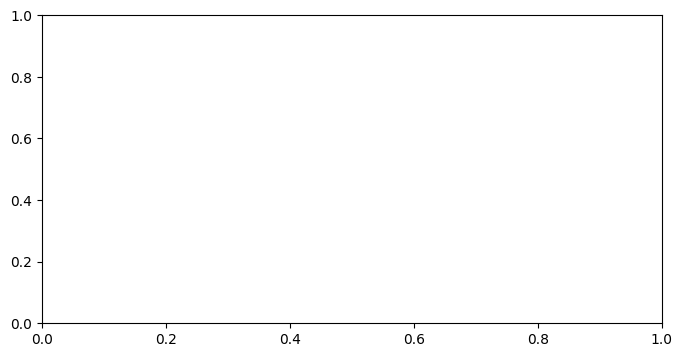

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.lineplot(data=data, x="k", y="score", ax=ax, hue="matrix based on", style='matrix based on')
plt.xlabel('Number of resource clusters')
plt.ylabel("Silhouette score")
plt.show()
f.savefig("plot2.pdf", bbox_inches='tight')